In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1) / 255.0

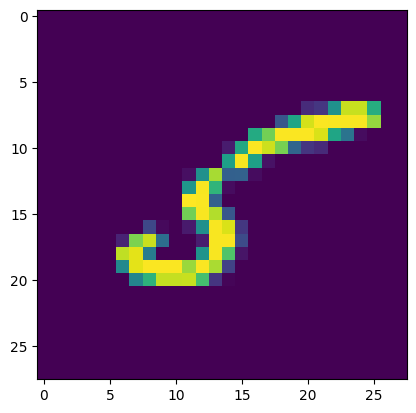

In [2]:
from matplotlib import pyplot as plt

plt.imshow(X_train[11])

In [3]:
from keras.layers import Conv2D, Flatten, Dense
from keras.layers import MaxPooling2D
from keras.models import Sequential

In [4]:
model = Sequential([
    Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(10, activation = 'softmax')
])

c:\Users\HP\Desktop\DATA\QUASTECH\ds-notes\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
model.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9235 - loss: 0.2577 - val_accuracy: 0.9672 - val_loss: 0.1171
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9735 - loss: 0.0883 - val_accuracy: 0.9786 - val_loss: 0.0755
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9808 - loss: 0.0635 - val_accuracy: 0.9807 - val_loss: 0.0667
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9840 - loss: 0.0524 - val_accuracy: 0.9823 - val_loss: 0.0573
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9861 - loss: 0.0454 - val_accuracy: 0.9830 - val_loss: 0.0591


In [7]:
model.evaluate(X_test, y_test, verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9843 - loss: 0.0448


[0.0447949655354023, 0.9843000173568726]

In [8]:
import tensorflow as tf
import numpy as np

def resize_image_tf(image_path, target_size):
    # Read the image file and decode it
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3) # Adjust channels if needed (e.g., grayscale)

    # Resize the image
    resized_img = tf.image.resize(img, target_size)

    # Optional: Normalize (scale to [0, 1])
    normalized_img = resized_img / 255.0
    
    # Add batch dimension
    input_tensor = tf.expand_dims(normalized_img, axis=0)
    
    return input_tensor

# Example usage:
# Assuming your model expects a 224x224 input
target_dims = (28, 28) 
input_image_path = './img/input.jpg'
processed_image = resize_image_tf(input_image_path, target_dims)
processed_image = tf.image.rgb_to_grayscale(processed_image)
# processed_image = tf.expand_dims(processed_image, axis=-1)
print(f"Processed image shape for CNN: {processed_image[0].shape}")
# print(f"Processed image data type: {processed_image}")
result = model.predict(processed_image)
print((result))
final_result = ""
for i,v in enumerate(result[0]):
    print(f"{v:.2f} ",i)

    if v == np.max(result[0]):
        final_result = i
print(final_result)
    # print(f"{v:.2f} ",i)

Processed image shape for CNN: (28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[[6.3650241e-06 8.5302734e-01 1.3538165e-01 9.5711630e-03 7.2856378e-06
  2.0102962e-07 7.1654981e-06 2.7201968e-04 1.6572850e-03 6.9425740e-05]]
0.00  0
0.85  1
0.14  2
0.01  3
0.00  4
0.00  5
0.00  6
0.00  7
0.00  8
0.00  9
1


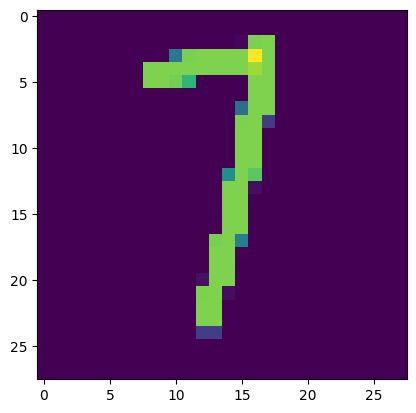

In [9]:
plt.imshow(processed_image[0])